In [136]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
DATAPATH = 'results/All_Apr12/'

## Compare 2D and 3D TSNE and PCA on Roya's biased censorship data
- data: http://stackoverflow.com/questions/5147112/matplotlib-how-to-put-individual-tags-for-a-scatter-plot
- tags: http://stackoverflow.com/questions/5147112/matplotlib-how-to-put-individual-tags-for-a-scatter-plot
- 3dscatter: http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
- 3dtags: http://stackoverflow.com/questions/12880254/python-plotting-3d-points-with-annotation
- pca: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- pca(2): http://sebastianraschka.com/Articles/2014_pca_step_by_step.html
- tsne: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

## Try

In [162]:
X = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]])
model = TSNE(n_components=2, random_state=0)
model.fit_transform(X)

array([[  887.28647183,   238.61440193],
       [ -714.79312427,  3243.34474117],
       [  957.30951328, -2505.78701595],
       [-1130.2839816 ,  -974.78647743]])

## Import Data

In [139]:
df = pd.read_html('ALL_Apr12_censorship_ratio-censored.html')[0].dropna(axis=1).rename(columns={'Unnamed: 0':'CO'}).set_index('CO')
mat = df.as_matrix()
df

,adult,arts,business,circum,computers,games,health,home,kids_and_teens,news,recreation,reference,regional,science,shopping,society,sports,vpn,world
CO,,,,,,,,,,,,,,,,,,,
BR,0.127932,0.070632,0.047753,0.063745,0.183333,0.238443,0.182320,0.110818,0.025316,0.094650,0.140187,0.078341,0.140271,0.144814,0.042105,0.170370,0.050167,0.155303,0.099602
CA,0.188119,0.112033,0.093750,0.163636,0.193182,0.345745,0.184615,0.201058,0.088000,0.142857,0.130081,0.081818,0.095238,0.213439,0.100000,0.290749,0.082090,0.284615,0.171806
CN,0.198263,0.161004,0.095875,0.170915,0.439614,0.193097,0.169725,0.130823,0.086268,0.084211,0.135812,0.141815,0.140575,0.197884,0.146821,0.228942,0.085290,0.386881,0.174274
CR,0.253333,0.000000,0.000000,0.000000,0.000000,0.323077,0.191011,0.000000,0.000000,0.000000,0.131868,0.134146,0.078431,0.000000,0.195652,0.000000,0.000000,0.000000,0.130841
CZ,0.181818,0.000000,0.000000,0.000000,0.000000,0.306122,0.206897,0.103448,0.245614,0.097561,0.146667,0.071429,0.107143,0.105263,0.107692,0.337079,0.000000,0.000000,0.098592
DE,0.146996,0.060768,0.041016,0.081673,0.233645,0.293194,0.187079,0.131122,0.052154,0.155000,0.115297,0.077441,0.172805,0.155039,0.115789,0.216650,0.063315,0.210037,0.153084
DK,0.104651,0.000000,0.000000,0.000000,0.236364,0.278689,0.218182,0.000000,0.052632,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ES,0.080460,0.070352,0.030612,0.150538,0.229508,0.235714,0.182857,0.120253,0.142857,0.134021,0.144654,0.137363,0.168831,0.130435,0.078261,0.229412,0.091954,0.270833,0.133803
FR,0.179178,0.100440,0.013786,0.101124,0.230052,0.260989,0.168709,0.087945,0.000000,0.101549,0.046005,0.075136,0.093023,0.141010,0.059013,0.263343,0.039604,0.248939,0.105218


# TSNE models


# 2D

In [108]:
model = TSNE(n_components=2, random_state=0)
df2 = pd.DataFrame(model.fit_transform(mat)).set_index(df.index)
df2

,0,1
CO,,
BR,56.170877,151.352787
CA,-21.530739,149.703352
CN,188.739664,42.766440
CR,-94.153223,208.900516
CZ,-294.922267,-72.446209
DE,108.308322,-19.613744
DK,58.574782,-140.227931
ES,169.835389,-534.522912
FR,-4.180059,-6.155538


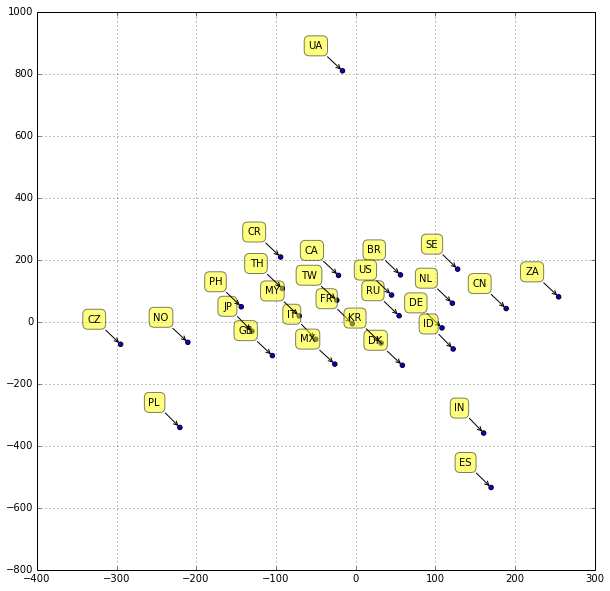

In [160]:
fig2, ax2 = subplots(1,1, figsize=(10,10))
ax2.scatter(df2[0], df2[1])
for label, x, y in zip(df2.index, df2[0], df2[1]):
    ax2.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
ax2.grid(1)
fig2.show()

# 3D

In [109]:
model3d = TSNE(n_components=3, random_state=0)
df3 = pd.DataFrame(model3d.fit_transform(mat)).set_index(df.index)
df3

,0,1,2
CO,,,
BR,302.666118,51.198766,241.519922
CA,377.980699,309.762270,-112.763443
CN,161.656808,-51.200873,44.458731
CR,58.133646,4.507685,332.670749
CZ,124.788970,1.206087,150.267269
DE,45.106416,257.463713,26.189162
DK,40.905662,-174.689543,-398.165805
ES,105.710582,140.948076,-74.897011
FR,385.401299,-280.106200,69.747861


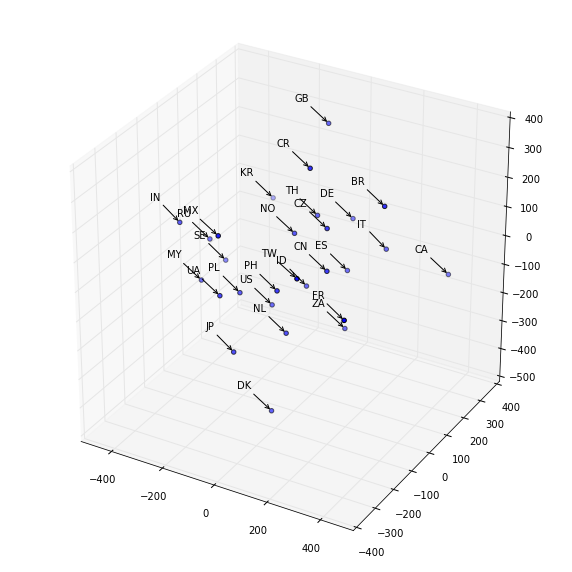

In [135]:
fig3 = plt.figure(figsize=(10,10))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(df3[0], df3[1], df3[2], zdir=u'z', s=20, c=u'b')

for label, x, y, z in zip(df3.index, df3[0], df3[1], df3[2]):
    x2, y2, _ = proj3d.proj_transform(x, y, z, ax.get_proj())
    ax3.annotate(
        label, 
        xy = (x2, y2), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
fig3.show()

# PCA models

# 2D

In [140]:
pca = PCA(n_components=2)

df4 = pd.DataFrame(pca.fit_transform(mat)).set_index(df.index)
df4

,0,1
CO,,
BR,-0.008587,0.074416
CA,-0.170077,-0.029961
CN,-0.382584,0.103845
CR,0.338252,0.215386
CZ,0.204217,-0.192376
DE,-0.099048,0.039624
DK,0.222169,0.253116
ES,-0.175177,0.012904
FR,-0.095581,0.073702


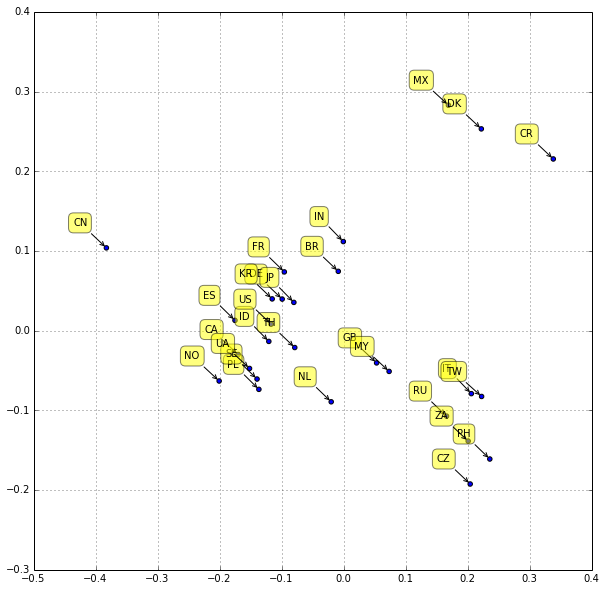

In [141]:
fig2, ax2 = subplots(1,1, figsize=(10,10))
ax2.scatter(df4[0], df4[1])
for label, x, y in zip(df4.index, df4[0], df4[1]):
    ax2.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
ax2.grid(1)
fig2.show()

# 3D

In [142]:
pca3d = PCA(n_components=3)

df5 = pd.DataFrame(pca3d.fit_transform(mat)).set_index(df.index)
df5

,0,1,2
CO,,,
BR,-0.008587,0.074416,0.027495
CA,-0.170077,-0.029961,0.071564
CN,-0.382584,0.103845,0.056336
CR,0.338252,0.215386,0.014449
CZ,0.204217,-0.192376,-0.065887
DE,-0.099048,0.039624,0.057660
DK,0.222169,0.253116,-0.104463
ES,-0.175177,0.012904,-0.055895
FR,-0.095581,0.073702,0.074699


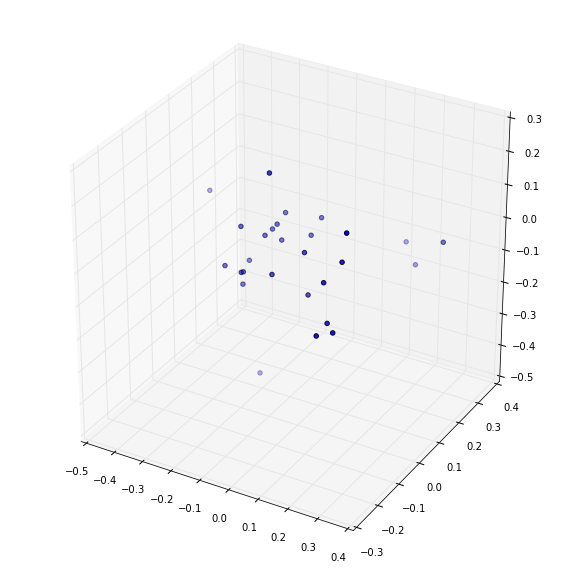

In [158]:
fig3 = plt.figure(figsize=(10,10))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(df5[0], df5[1], df5[2], zdir=u'z', s=20, c=u'b')

#for label, x, y, z in zip(df5.index, df5[0]*500, df5[1]*500, df5[2]*500):
    #x2, y2, _ = proj3d.proj_transform(x, y, z, ax.get_proj())
    #ax3.annotate(
    #    label, 
    #    xy = (x2, y2), xytext = (-20,20),
    #    textcoords = 'offset points', ha = 'right', va = 'bottom',
        #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    #    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
fig3.show()